<a href="https://colab.research.google.com/github/Endalebob/ml-track/blob/main/IMDB_Movies_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="color: blue;">Parse the .csv file into a data frame</h1>

In [3]:
all_data = pd.read_csv("imdb_top_1000.csv")

In [4]:
all_data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


<h1 style="color: blue;">What are the column names in the dataset?</h1>

In [5]:
column_names = all_data.columns
column_names

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [7]:
all_data.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


<h1 style="color: blue;">What is the average rating of the movies?</h1>

In [8]:
average_rating_of_movies = all_data["IMDB_Rating"].mean()
print("Average Rating of The Movies is equal to ",format(average_rating_of_movies,'.2'))

Average Rating of The Movies is equal to  7.9


In [9]:
unique_genres = all_data["Genre"].value_counts()
unique_genres

Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: Genre, Length: 202, dtype: int64

<h1 style="color: blue;">How many unique genres are there?</h1>

In [10]:
no_of_unique_genres = unique_genres.size
print("Number of Unique Genres is equal to {}".format(no_of_unique_genres))


Number of Unique Genres is equal to 202


<h1 style="color: blue;">Save your results as a csv file.</h1>

In [11]:
results = pd.DataFrame(
    {
        "column_names":column_names,
        "average_rating_of_movies":average_rating_of_movies,
        "no_of_unique_genres":no_of_unique_genres,
        
    }
)

In [12]:
results.to_csv('results.csv', index=False)

<h1 style="color: blue;">Plot a histogram of the genre distribution of the movies. How many movies from each genre are there in this list.</h1>

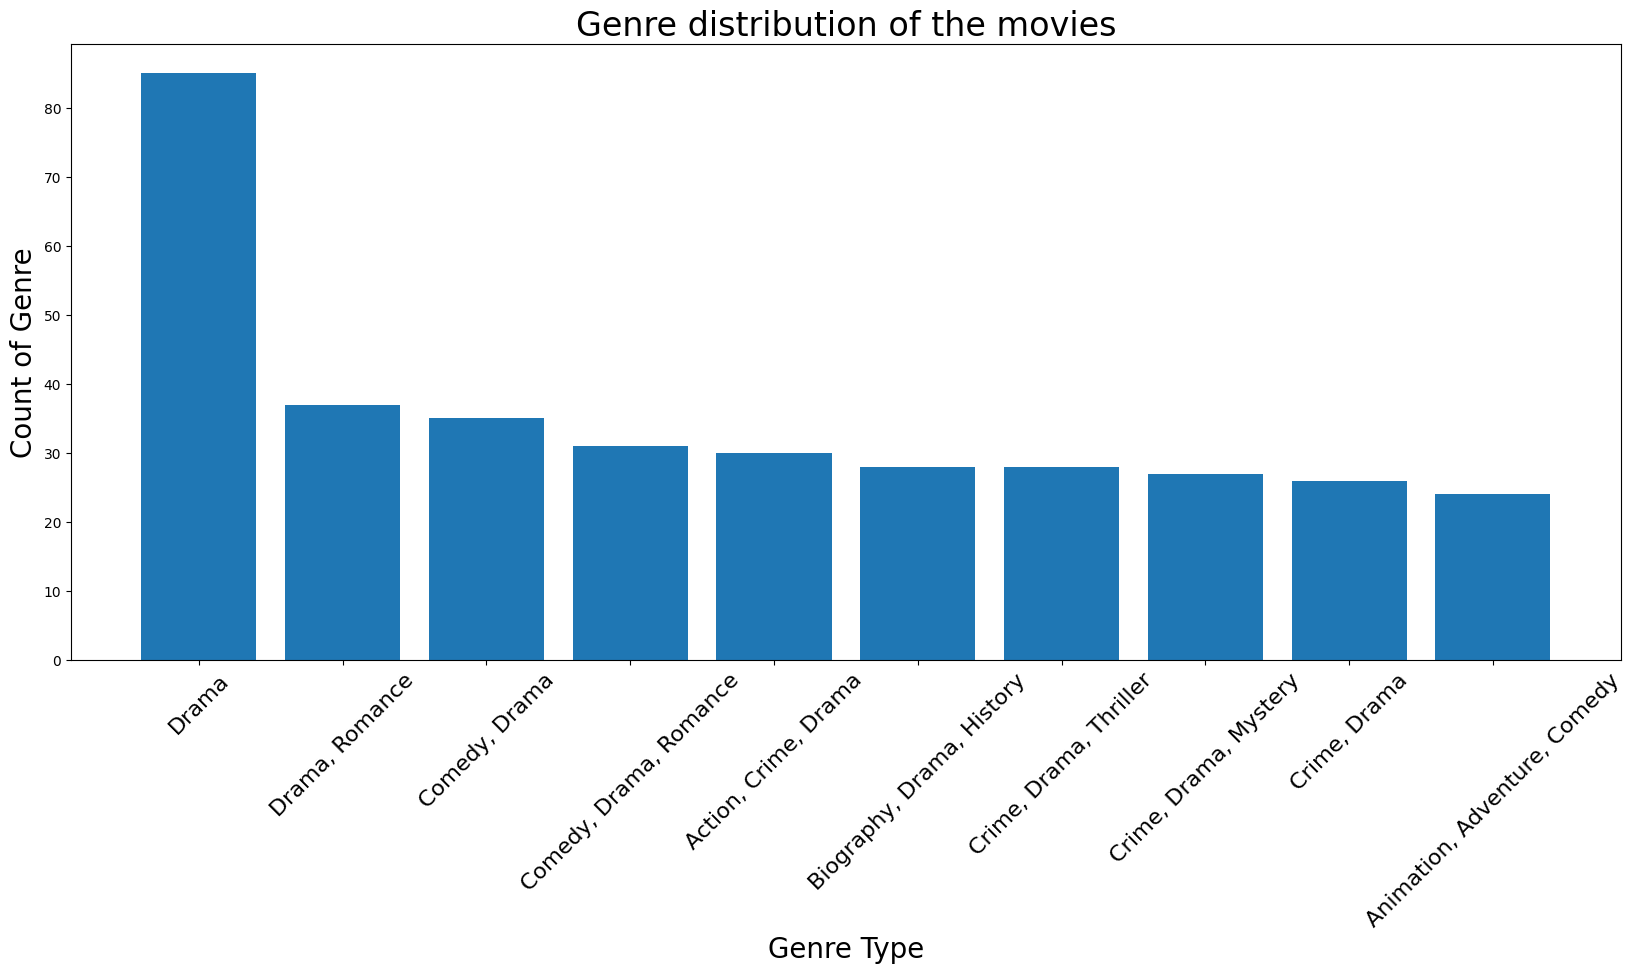

In [13]:

plt.figure(figsize=(20, 8))  # Increase the figure size

top_genre_counts = unique_genres.head(10)  # Select the top 10 most common Genre types

plt.bar(top_genre_counts.index, top_genre_counts)
plt.title('Genre distribution of the movies',fontsize=24)
plt.xlabel('Genre Type',fontsize=20)
plt.ylabel('Count of Genre',fontsize=20)
plt.xticks(rotation=45,fontsize=16)  # Rotate the x-axis labels by 45 degrees

plt.show()


<h1 style="color: blue;">Plot a scatterplot in this dataset for the number of movies vs year (Each year, how many movies made to this top 1000 list?)</h1>

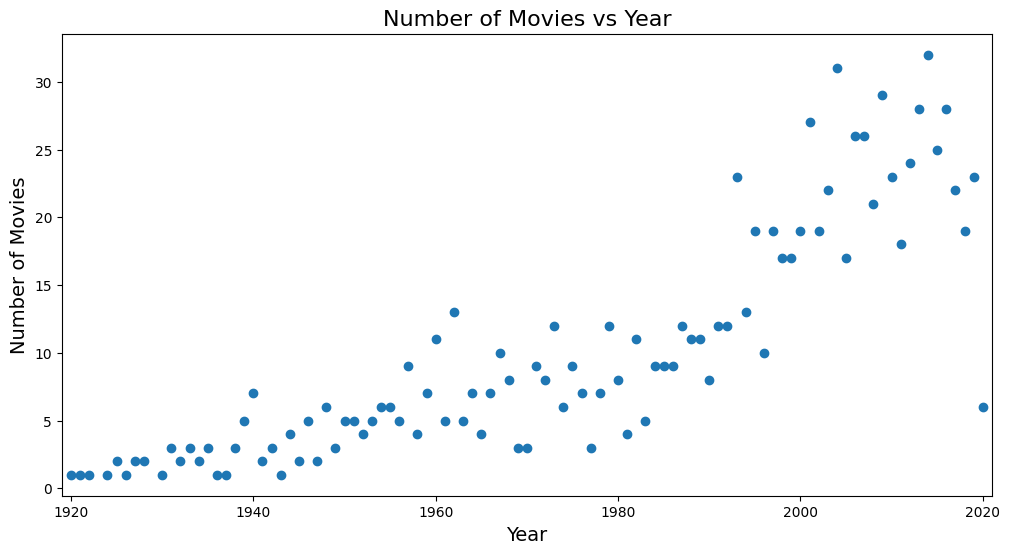

In [14]:

# Filter out non-numeric values from the 'Released_Year' column
numeric_years = [int(year) for year in all_data['Released_Year'] if year.isdigit()]

# Count the number of movies for each numeric year
movies_per_year = pd.Series(numeric_years).value_counts().sort_index()

# Get the unique years in ascending order
years = movies_per_year.index.tolist()

# Get the corresponding count of movies for each year
movie_counts = movies_per_year.values.tolist()

plt.figure(figsize=(12, 6))  # Increase the figure size

plt.scatter(years, movie_counts)
plt.title('Number of Movies vs Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

plt.xlim(years[0] - 1, years[-1] + 1)  # Set x-axis limits slightly beyond the minimum and maximum years

plt.show()